In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from datetime import datetime 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [6]:

#from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
import catboost
from catboost import CatBoostClassifier

In [9]:
data = pd.read_csv("creditcard.csv")

In [10]:
pd.set_option("display.max_columns", 40)

In [11]:
data.head(5)
data.shape
data.describe()
data.isnull().sum()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
temp = data["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Class', ylabel='values'>

Text(0.5, 1.0, 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Number of Transactions')

([<matplotlib.axis.XTick at 0x175eb69c0>,
 [Text(0, 0, 'Not Fraud (0)'), Text(1, 0, 'Fraud (1)')])

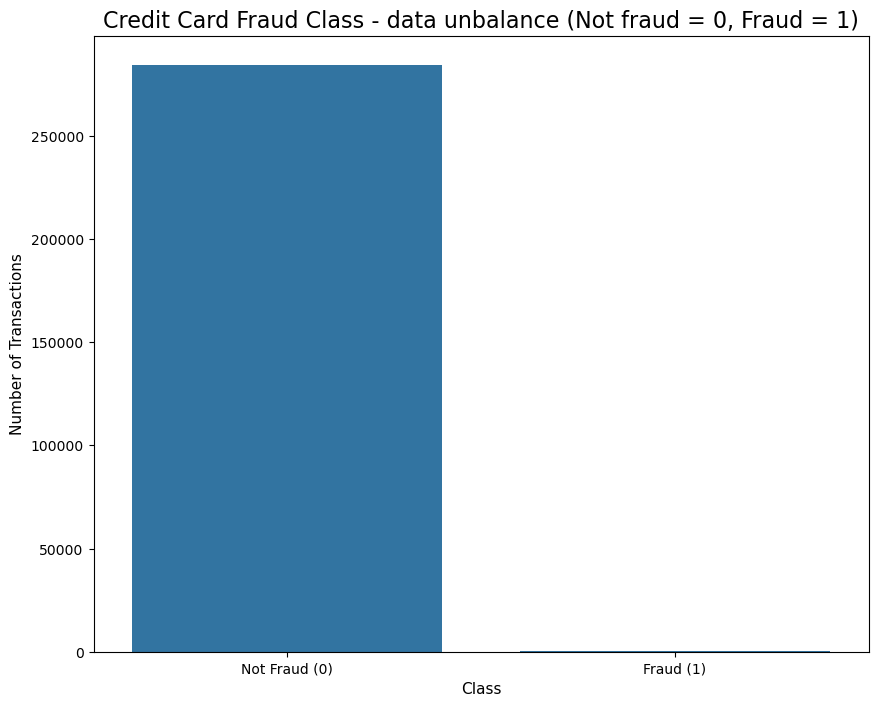

In [13]:
plt.figure(figsize = (10,8))
sns.barplot(x = df["Class"], y= df["values"])
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)', fontsize=16)
plt.xlabel('Class', fontsize=11)
plt.ylabel('Number of Transactions', fontsize=11)
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])  

In [14]:
temp

Class
0    284315
1       492
Name: count, dtype: int64

In [27]:
class0 = data.loc[data['Class'] == 0]["Time"]
class1 = data.loc[data['Class'] == 1]["Time"]

In [29]:
hist_data = [class0, class1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'template': '...',
    'title': {'text': 'Credit Card Transactions Time Density Plot'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'title': {'text': 'Time [s]'}, 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0}
})

In [44]:
class0 = data.loc[data['Class'] == 0]["Time"]/3600.0
class1 = data.loc[data['Class'] == 1]["Time"]/3600.0

hist_data = [class0, class1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [hours]'))
iplot(fig, filename='dist_only')

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'template': '...',
    'title': {'text': 'Credit Card Transactions Time Density Plot'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'title': {'text': 'Time [hours]'}, 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0}
})

In [45]:
data["Time(Hours)"] = data["Time"].apply(lambda x : np.floor(x/3600))

In [76]:
temp = data.groupby(['Time(Hours)', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()

In [77]:
temp.head(10)

,Time(Hours),Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437
5,2.0,1,1.0,1809.68,21,1829.78,87.132381,1.000,155776.441219
6,3.0,0,0.0,1903.26,1808,94086.79,52.039154,15.950,16741.786661
7,3.0,1,0.0,179.66,13,220.05,16.926923,1.000,2457.208190
8,4.0,0,0.0,2126.13,1076,79050.36,73.466877,15.950,24416.863654
9,4.0,1,1.0,766.36,6,790.26,131.710000,3.860,96679.482040


In [80]:
df = pd.DataFrame(temp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']

In [81]:
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


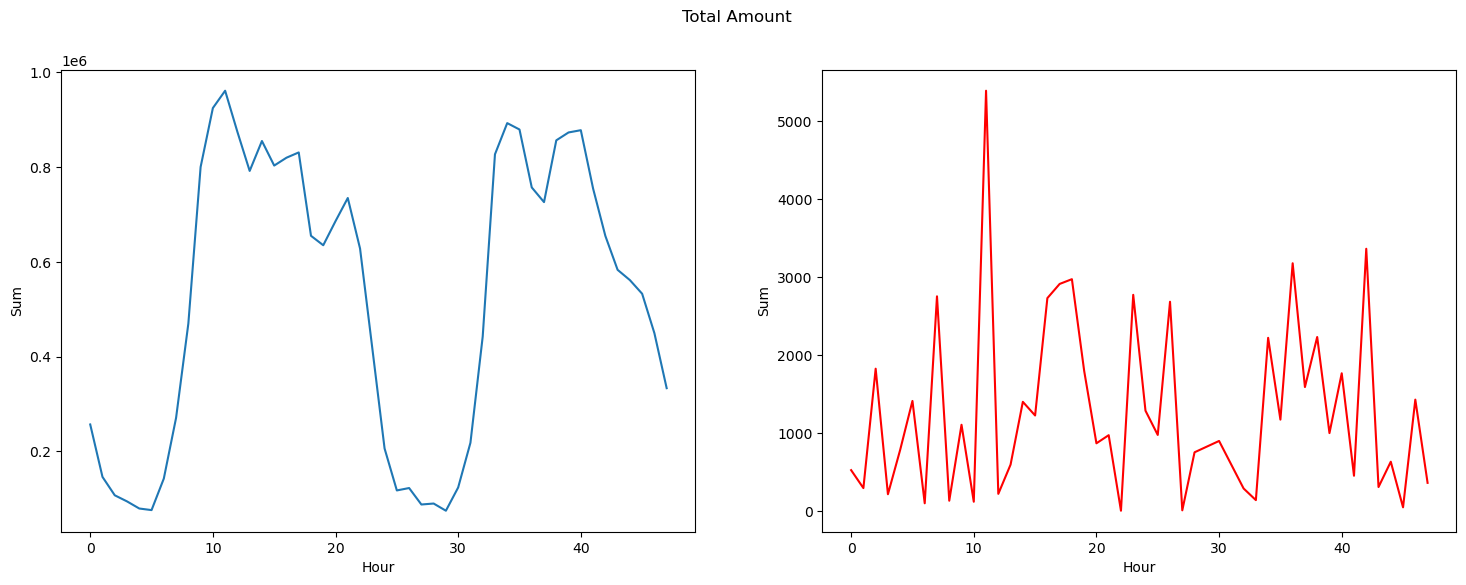

In [85]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Sum", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

Text(0.5, 0.98, 'Total Number of Transactions')

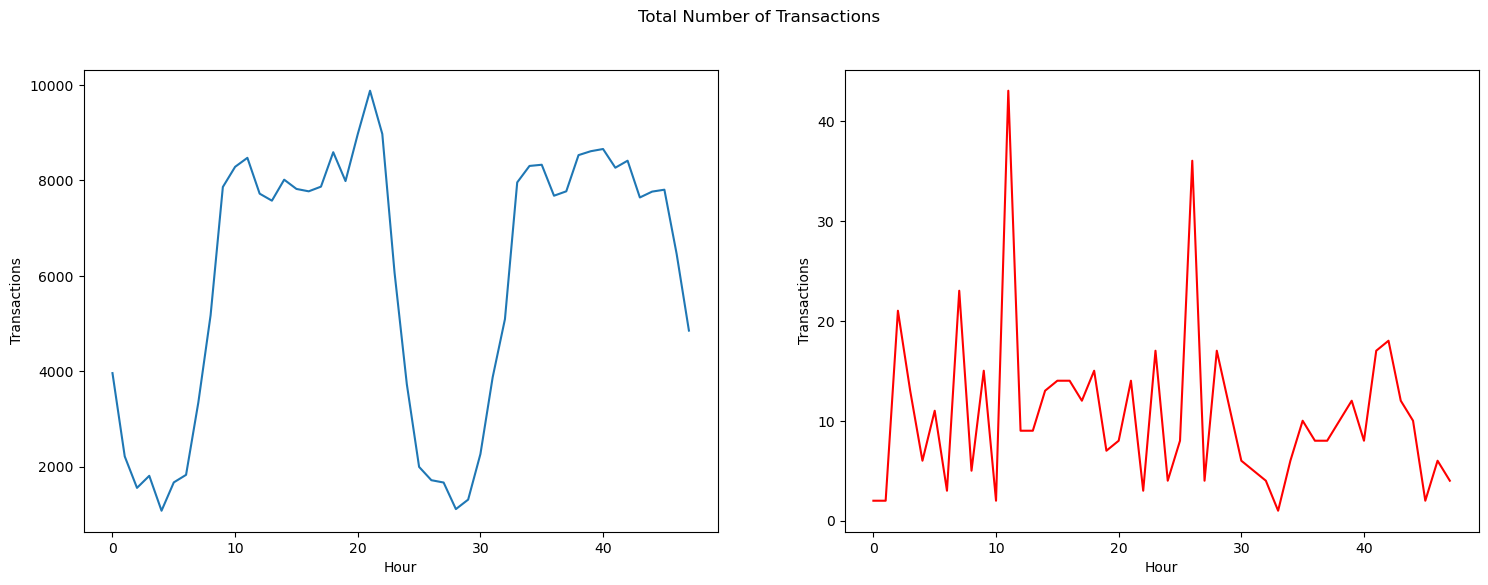

In [86]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

Text(0.5, 0.98, 'Average Amount of Transactions')

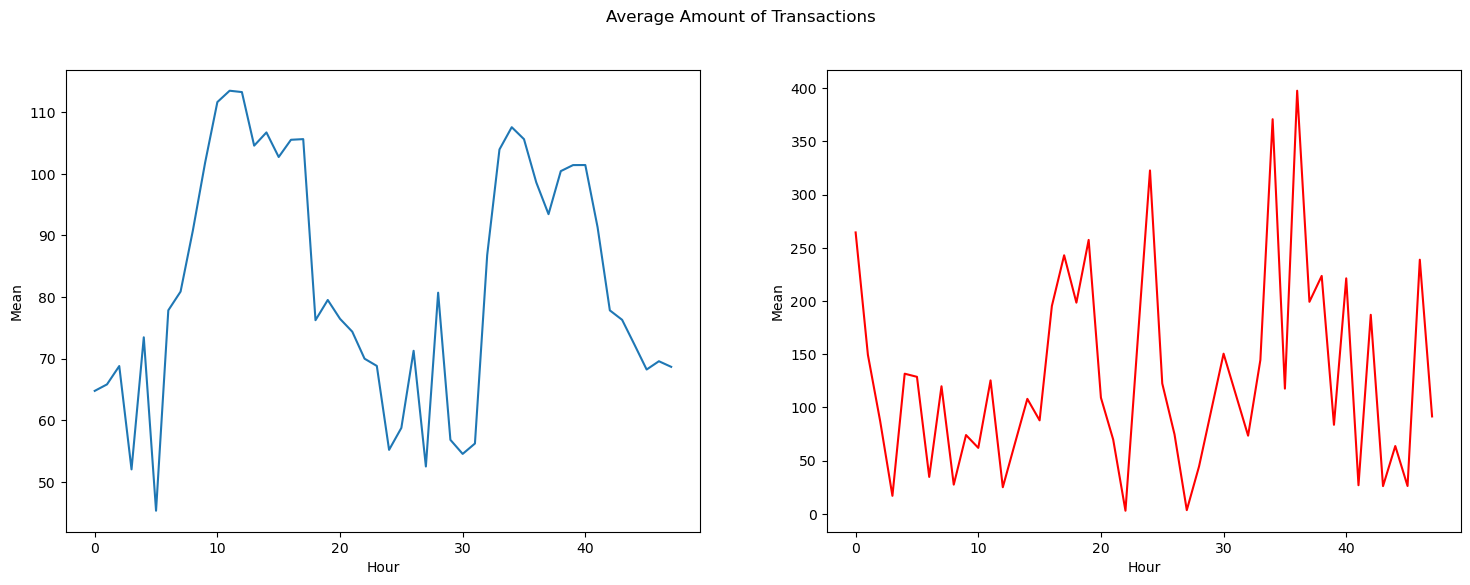

In [87]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Mean", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

Text(0.5, 0.98, 'Maximum Amount of Transactions')

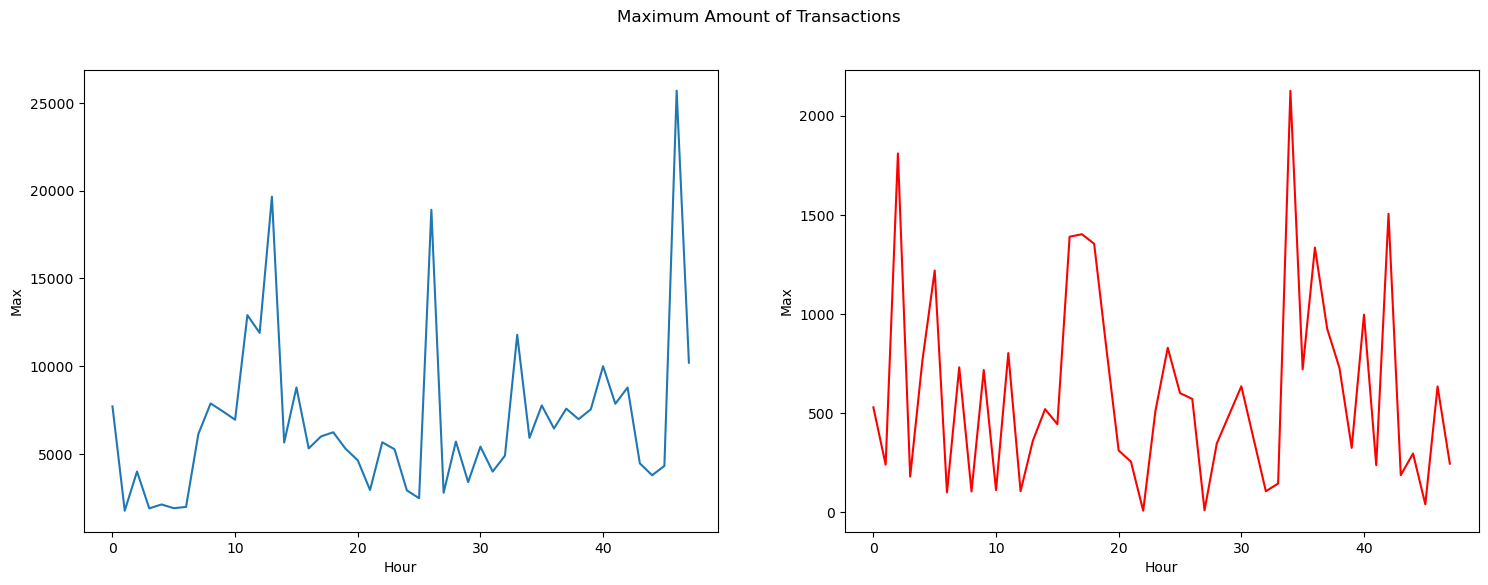

In [88]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Max", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

Text(0.5, 0.98, 'Median Amount of Transactions')

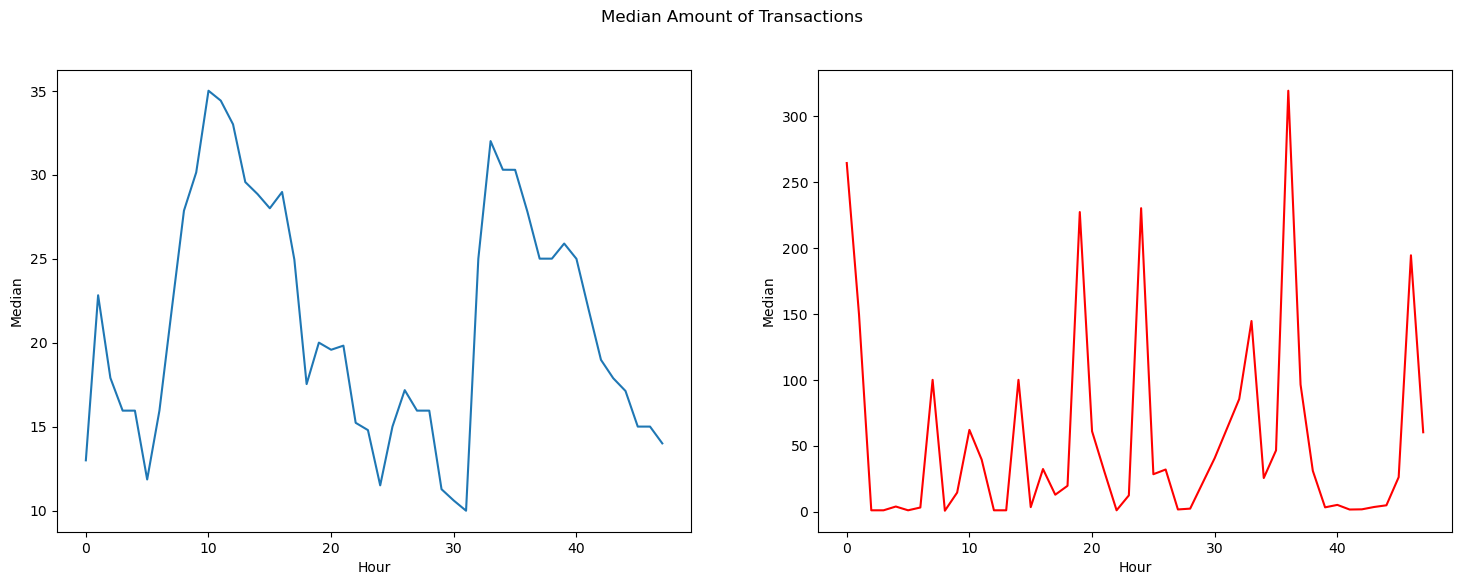

In [89]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Median", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

Text(0.5, 0.98, 'Minimum Amount of Transactions')

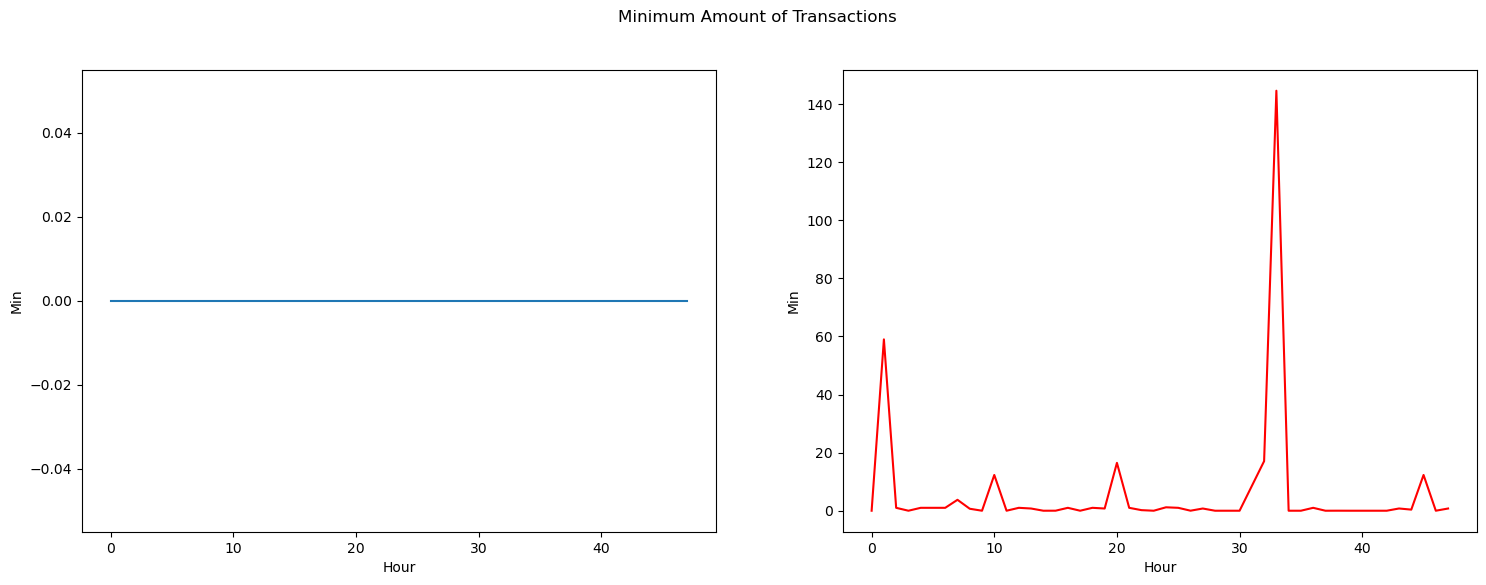

In [90]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(18,6))
f1 = sns.lineplot(ax = x1, x="Hour", y="Min", data=df.loc[df.Class==0])
f2 = sns.lineplot(ax = x2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

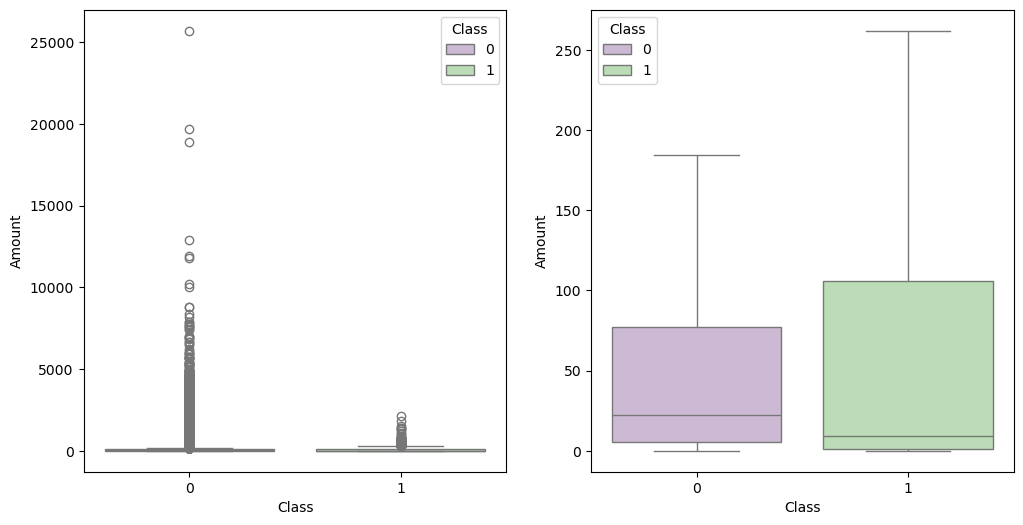

In [96]:
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(12,6))
f1 = sns.boxplot(ax = x1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
f2 = sns.boxplot(ax = x2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()

In [97]:
temp = data[['Amount','Class']].copy()
class0 = temp.loc[temp['Class'] == 0]['Amount']
class1 = temp.loc[temp['Class'] == 1]['Amount']
class0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [98]:
class1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [108]:
fraud = data.loc[data["Class"]==1]
fraud[["Amount", "Time(Hours)"]].describe()

,Amount,Time(Hours)
count,492.000000,492.000000
mean,122.211321,21.939024
std,256.683288,13.283389
min,0.000000,0.000000
25%,1.000000,11.000000
50%,9.250000,20.000000
75%,105.890000,35.000000
max,2125.870000,47.000000


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Time', ylabel='Amount'>

Text(0.5, 1.0, 'Amount of Fraudulent Transactions')

Text(0.5, 0, 'Time [s]')

Text(0, 0.5, 'Amount')

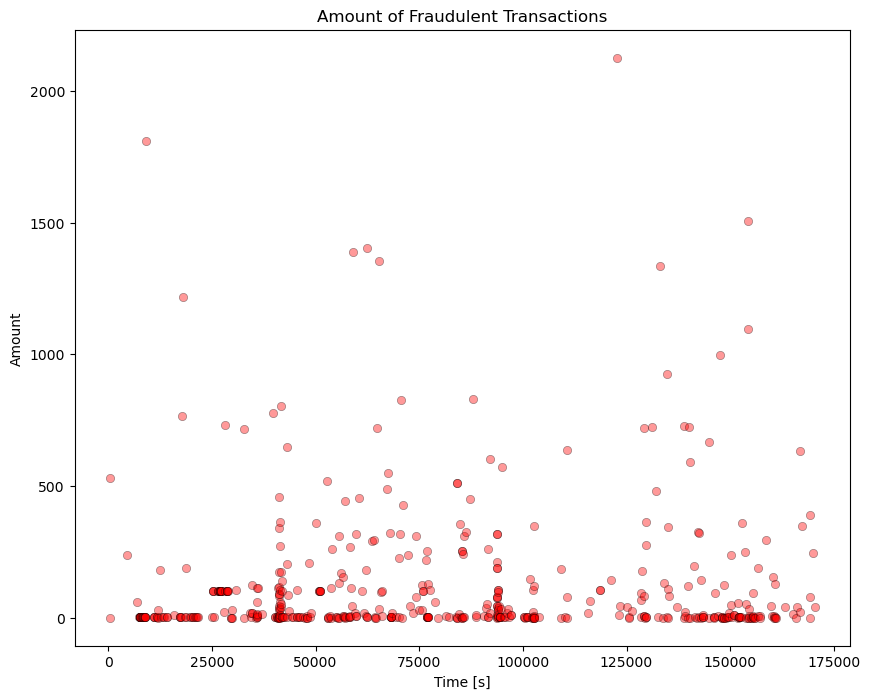

In [114]:
plt.figure(figsize= (10,8))
sns.scatterplot( x='Time', y='Amount', data=fraud, color='red',  alpha=0.40, edgecolor='black' , )

plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')

# Show the plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Credit Card Transactions features correlation plot (Pearson)')

<Axes: title={'center': 'Credit Card Transactions features correlation plot (Pearson)'}>

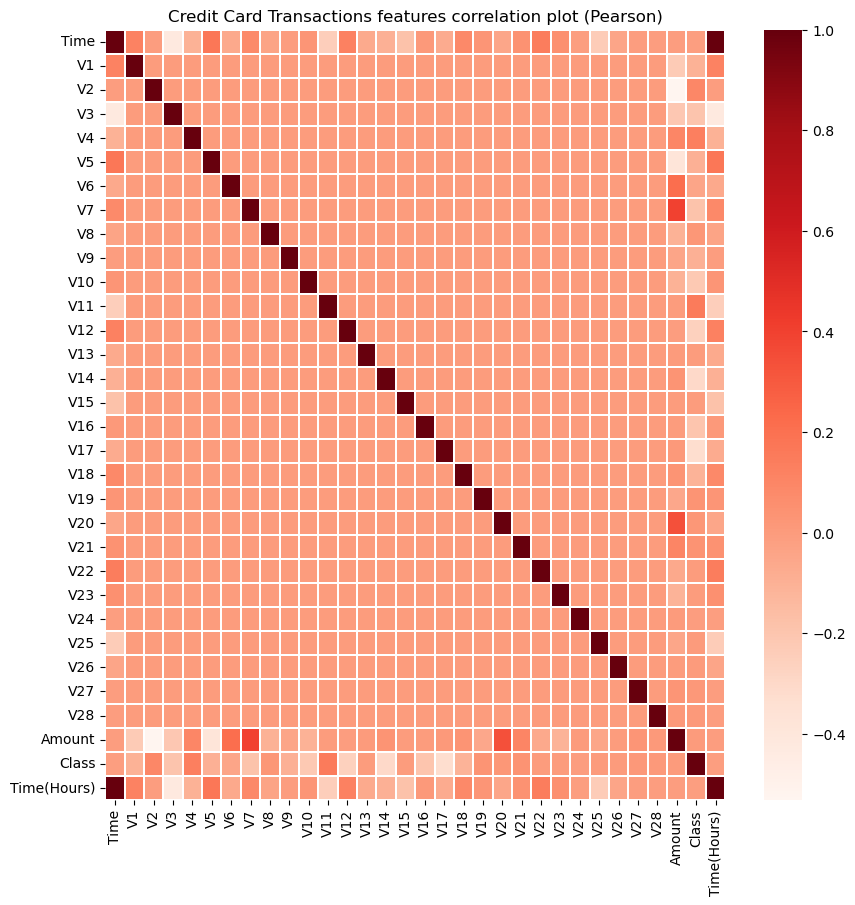

In [116]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

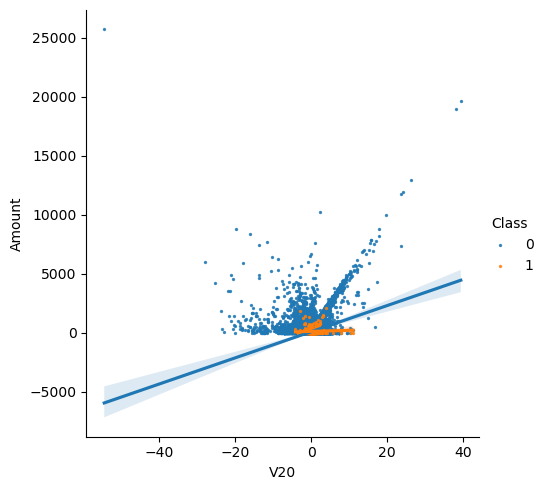

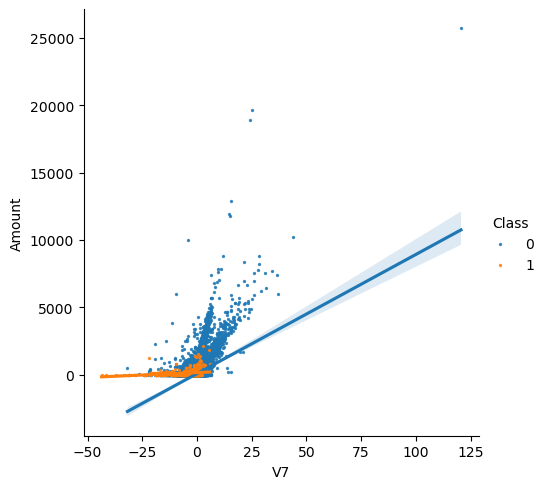

In [117]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

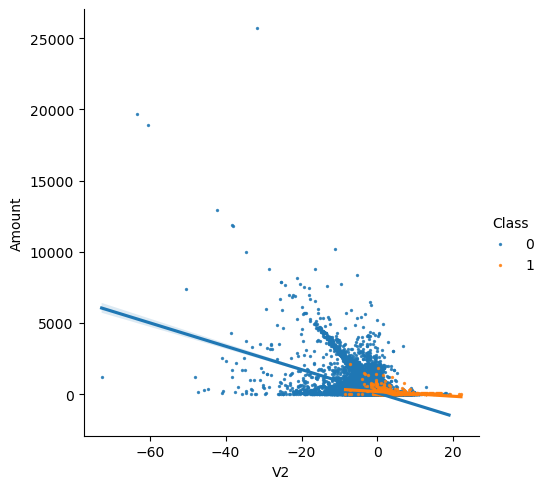

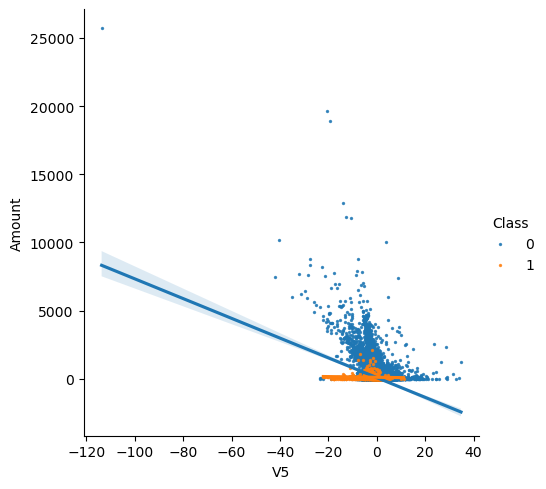

In [120]:
s = sns.lmplot(x='V2', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Time', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Time', ylabel='Density'>

Text(0.5, 0, 'Time')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V1', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V1', ylabel='Density'>

Text(0.5, 0, 'V1')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V2', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V2', ylabel='Density'>

Text(0.5, 0, 'V2')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V3', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V3', ylabel='Density'>

Text(0.5, 0, 'V3')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V4', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V4', ylabel='Density'>

Text(0.5, 0, 'V4')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V5', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V5', ylabel='Density'>

Text(0.5, 0, 'V5')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V6', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V6', ylabel='Density'>

Text(0.5, 0, 'V6')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V7', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V7', ylabel='Density'>

Text(0.5, 0, 'V7')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V8', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V8', ylabel='Density'>

Text(0.5, 0, 'V8')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V9', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V9', ylabel='Density'>

Text(0.5, 0, 'V9')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V10', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V10', ylabel='Density'>

Text(0.5, 0, 'V10')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V11', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V11', ylabel='Density'>

Text(0.5, 0, 'V11')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V12', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V12', ylabel='Density'>

Text(0.5, 0, 'V12')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V13', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V13', ylabel='Density'>

Text(0.5, 0, 'V13')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V14', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V14', ylabel='Density'>

Text(0.5, 0, 'V14')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V15', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V15', ylabel='Density'>

Text(0.5, 0, 'V15')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V16', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V16', ylabel='Density'>

Text(0.5, 0, 'V16')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V17', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V17', ylabel='Density'>

Text(0.5, 0, 'V17')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V18', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V18', ylabel='Density'>

Text(0.5, 0, 'V18')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V19', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V19', ylabel='Density'>

Text(0.5, 0, 'V19')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V20', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V20', ylabel='Density'>

Text(0.5, 0, 'V20')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V21', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V21', ylabel='Density'>

Text(0.5, 0, 'V21')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V22', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V22', ylabel='Density'>

Text(0.5, 0, 'V22')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V23', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V23', ylabel='Density'>

Text(0.5, 0, 'V23')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V24', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V24', ylabel='Density'>

Text(0.5, 0, 'V24')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V25', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V25', ylabel='Density'>

Text(0.5, 0, 'V25')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V26', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V26', ylabel='Density'>

Text(0.5, 0, 'V26')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V27', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V27', ylabel='Density'>

Text(0.5, 0, 'V27')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V28', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='V28', ylabel='Density'>

Text(0.5, 0, 'V28')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Amount', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Amount', ylabel='Density'>

Text(0.5, 0, 'Amount')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Axes: xlabel='Class', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Axes: xlabel='Class', ylabel='Density'>

Text(0.5, 0, 'Class')

<Axes: >

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Time(Hours)', ylabel='Density'>

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/2163968552.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




<Axes: xlabel='Time(Hours)', ylabel='Density'>

Text(0.5, 0, 'Time(Hours)')

<Figure size 640x480 with 0 Axes>

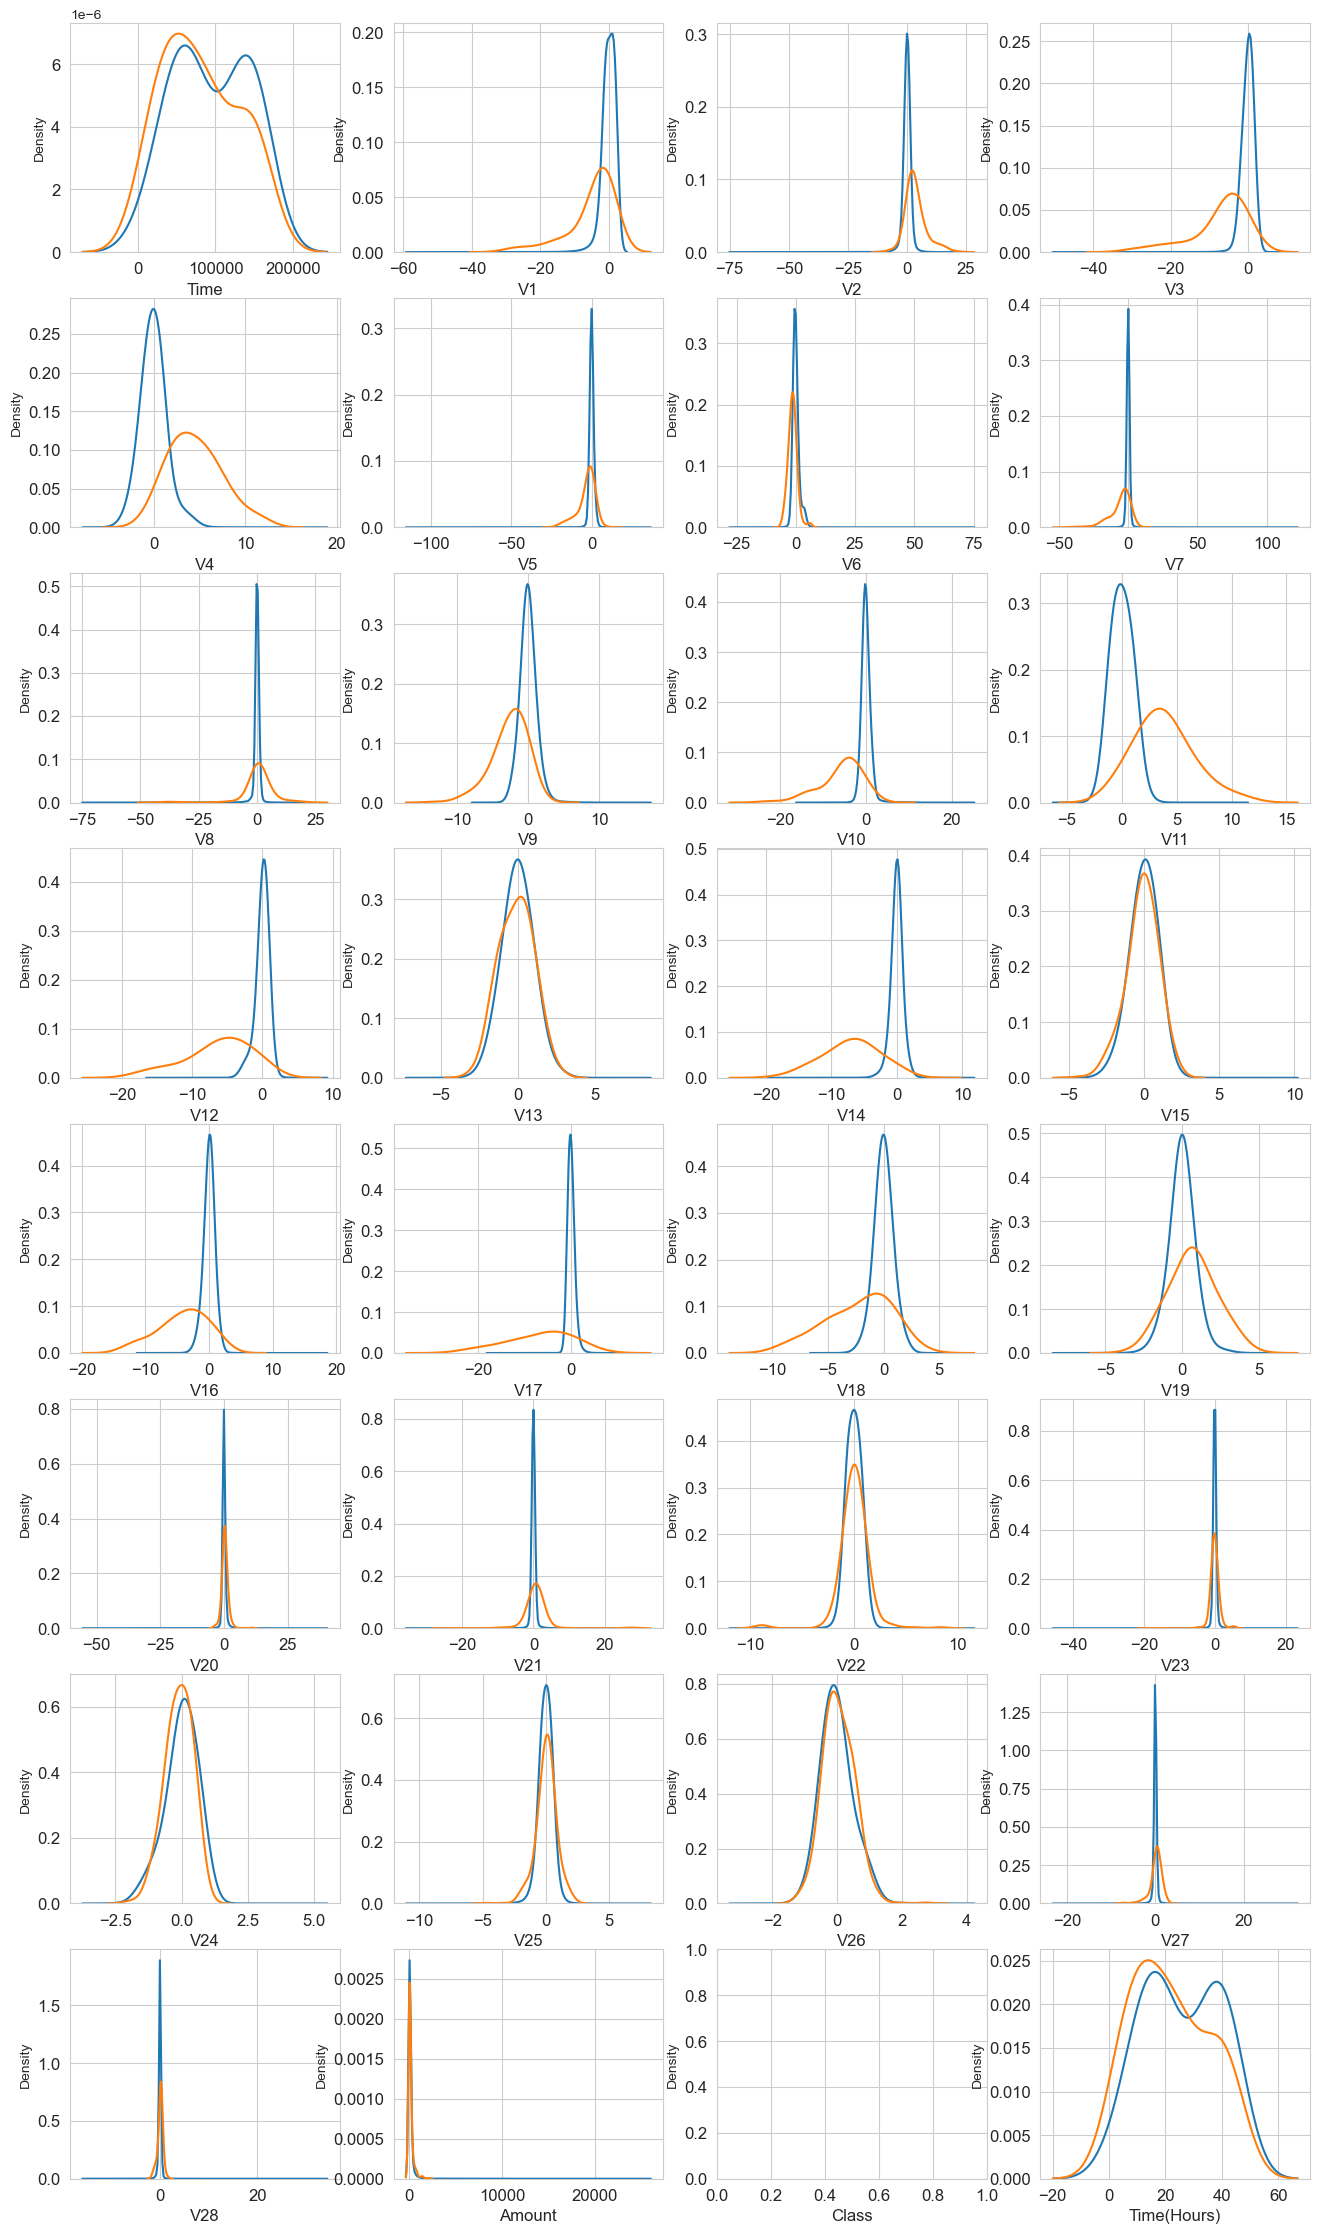

In [121]:
var = data.columns.values

i = 0
a = data.loc[data['Class'] == 0]
b = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(a[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(b[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [125]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']

In [130]:
train_data, test_data = train_test_split(data, test_size= 0.2, random_state= 37, shuffle=True )
train_data, valid_data = train_test_split(train_data, test_size= 0.1, random_state=37, shuffle=True )

In [132]:
clf = RandomForestClassifier(n_jobs= -1, 
                             random_state=37,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [136]:
clf.fit(train_data[predictors], train_data[target].values)

RandomForestClassifier(n_jobs=-1, random_state=37, verbose=False)

In [137]:
prediction = clf.predict(valid_data[predictors])

<Figure size 700x400 with 0 Axes>

Text(0.5, 1.0, 'Features importance')

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/4176298021.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/4176298021.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'V17'),
 Text(1, 0, 'V12'),
 Text(2, 0, 'V14'),
 Text(3, 0, 'V16'),
 Text(4, 0, 'V10'),
 Text(5, 0, 'V11'),
 Text(6, 0, 'V9'),
 Text(7, 0, 'V18'),
 Text(8, 0, 'V7'),
 Text(9, 0, 'V4'),
 Text(10, 0, 'V26'),
 Text(11, 0, 'V21'),
 Text(12, 0, 'V1'),
 Text(13, 0, 'V8'),
 Text(14, 0, 'V3'),
 Text(15, 0, 'V28'),
 Text(16, 0, 'Time'),
 Text(17, 0, 'V2'),
 Text(18, 0, 'V6'),
 Text(19, 0, 'V15'),
 Text(20, 0, 'V19'),
 Text(21, 0, 'V22'),
 Text(22, 0, 'V20'),
 Text(23, 0, 'V27'),
 Text(24, 0, 'V5'),
 Text(25, 0, 'V13'),
 Text(26, 0, 'V24'),
 Text(27, 0, 'V25'),
 Text(28, 0, 'Amount'),
 Text(29, 0, 'V23')]

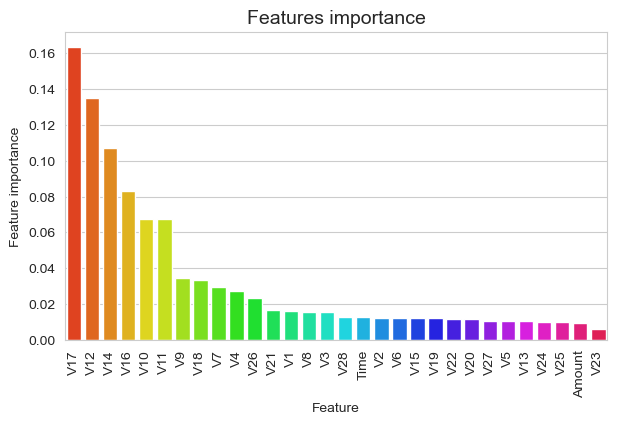

In [140]:
temp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
temp = temp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
palette = sns.color_palette("hsv", len(temp))
s = sns.barplot(x='Feature',y='Feature importance',data=temp, palette=palette)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

<Axes: xlabel='Predicted', ylabel='Actual'>

Text(0.5, 1.0, 'Confusion Matrix')

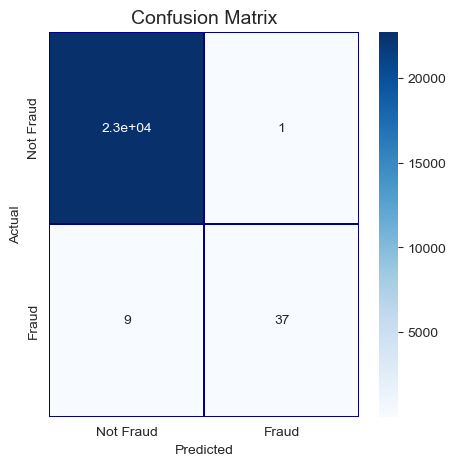

In [142]:
cm = pd.crosstab(valid_data[target].values, prediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [143]:
roc_auc_score(valid_data[target].values, prediction)

0.9021519243896237

In [145]:
clf = AdaBoostClassifier(random_state=37,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [148]:
clf.fit(train_data[predictors], train_data[target].values)

/opt/anaconda3/envs/newpython/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=37)

In [149]:
preds = clf.predict(valid_data[predictors])

<Figure size 700x400 with 0 Axes>

Text(0.5, 1.0, 'Features importance')

/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/3780256209.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/69/gghmg0591zv1kmhz830nsysr0000gn/T/ipykernel_33336/3780256209.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'V4'),
 Text(1, 0, 'Time'),
 Text(2, 0, 'V24'),
 Text(3, 0, 'V10'),
 Text(4, 0, 'V3'),
 Text(5, 0, 'V14'),
 Text(6, 0, 'V12'),
 Text(7, 0, 'V8'),
 Text(8, 0, 'V16'),
 Text(9, 0, 'V9'),
 Text(10, 0, 'V6'),
 Text(11, 0, 'V18'),
 Text(12, 0, 'V25'),
 Text(13, 0, 'V21'),
 Text(14, 0, 'V26'),
 Text(15, 0, 'V20'),
 Text(16, 0, 'V28'),
 Text(17, 0, 'V19'),
 Text(18, 0, 'Amount'),
 Text(19, 0, 'V17'),
 Text(20, 0, 'V22'),
 Text(21, 0, 'V11'),
 Text(22, 0, 'V7'),
 Text(23, 0, 'V5'),
 Text(24, 0, 'V27'),
 Text(25, 0, 'V2'),
 Text(26, 0, 'V1'),
 Text(27, 0, 'V13'),
 Text(28, 0, 'V15'),
 Text(29, 0, 'V23')]

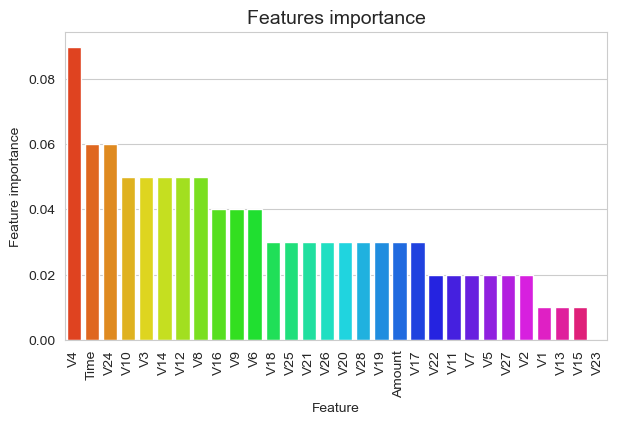

In [151]:
temp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
temp = temp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
palette = sns.color_palette("hsv", len(temp))
s = sns.barplot(x='Feature',y='Feature importance',data=temp, palette= palette)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

<Axes: xlabel='Predicted', ylabel='Actual'>

Text(0.5, 1.0, 'Confusion Matrix')

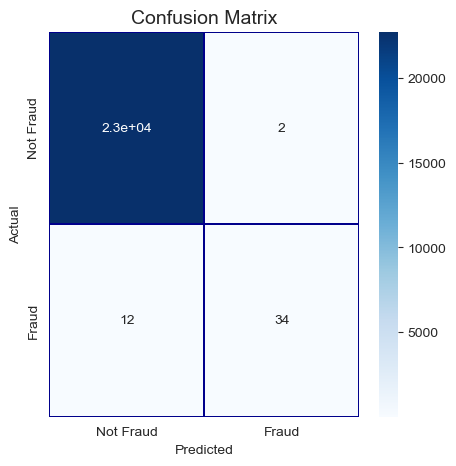

In [152]:
cm = pd.crosstab(valid_data[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [154]:
roc_auc_score(valid_data[target].values, preds)

0.8695212400835951

In [157]:
dtrain = xgb.DMatrix(train_data[predictors], train_data[target].values)
dvalid = xgb.DMatrix(valid_data[predictors], valid_data[target].values)
dtest = xgb.DMatrix(test_data[predictors], test_data[target].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

In [159]:
MAX_ROUNDS = 500         
EARLY_STOP = 20                      
VERBOSE_EVAL = 10                    
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                evals= watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.91642	eval-auc:0.91249
[10]	train-auc:0.93101	eval-auc:0.91108
[20]	train-auc:0.96220	eval-auc:0.95168
[30]	train-auc:0.97453	eval-auc:0.95002
[40]	train-auc:0.98672	eval-auc:0.96119
[50]	train-auc:0.99528	eval-auc:0.97141
[60]	train-auc:0.99866	eval-auc:0.98037
[70]	train-auc:0.99969	eval-auc:0.98436
[80]	train-auc:0.99983	eval-auc:0.98699
[82]	train-auc:0.99989	eval-auc:0.98623


<Axes: title={'center': 'Features importance (XGBoost)'}, xlabel='F score', ylabel='Features'>

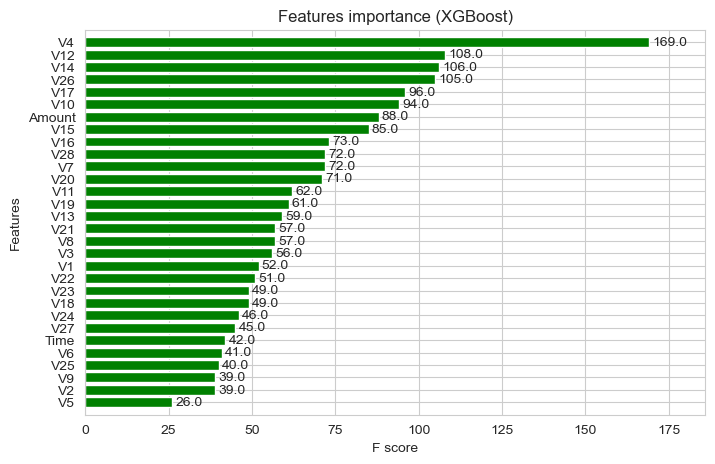

In [160]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [161]:
preds = model.predict(dtest)

In [163]:
roc_auc_score(test_data[target].values, preds)

0.9824502053606797